In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv("preprocessed_5.csv")

In [4]:
df.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'BTH_YR', 'GENDER', 'IS_KRN', 'AGE',
       'SCTR_CD', 'COM_SN', 'POL_SN', 'GIS_CD', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_ST_DT', 'CT_END_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD',
       'CT_CHNL_CD', 'INSU_DAYS', 'INSU_YEAR', 'MGG_GRP_CD', 'MGG_CD',
       'MGG_CNT', 'MGG_AMT_SUM'],
      dtype='object')

In [5]:
# 보험종류 코드로 치아보험 가져오기
df_d = df[df.INS_GBN_CD == 8]
df_d

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
46,537789,1,1973,2,1,50,3,5460366,320238,11,...,18,2,5,1,1827,6,A95,A9500,1,100
47,537789,1,1973,2,1,50,3,5460366,320238,11,...,18,2,5,1,1827,6,A95,A9509,1,800
48,537789,1,1973,2,1,50,3,5460366,320238,11,...,18,2,5,1,1827,6,A95,A9599,1,240
319,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,13,2,5,1,3653,11,A95,A9500,1,100
320,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,13,2,5,1,3653,11,A95,A9599,1,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407404,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,31,2,10,6,3652,10,A95,A9599,1,660
407405,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,31,2,10,6,3652,10,A6,A6999,1,100
407406,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,12,2,10,6,3653,11,A95,A9599,1,440
407407,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,12,2,10,6,3653,11,A95,A9500,6,200


# 담보(코드, 그룹코드) 구성

In [6]:
# 치아보험이 가진 그룹 코드들 확인
df_d.MGG_GRP_CD.unique()

array(['A95', 'A1', 'A3', 'A5', 'A6', 'A96', 'A7', 'A4', 'A99', 'A94'],
      dtype=object)

In [7]:
# 보험종류코드로 묶기
grouped = df_d.groupby("INS_GBN_CD")

In [8]:
for key, group in grouped:
    print("보험종류", key)
    for n in group.MGG_GRP_CD.unique():
        print(n, df_d[df_d["MGG_GRP_CD"] == n].MGG_CD.unique())

보험종류 8
A95 ['A9500' 'A9509' 'A9599']
A1 ['A1400' 'A1300' 'A1100']
A3 ['A3301' 'A3300' 'A3101' 'A3100']
A5 ['A5999' 'A5100' 'A5300' 'A5399' 'A5301' 'A5109' 'A5309' 'A5199']
A6 ['A6999' 'A6100' 'A6112' 'A6300' 'A6302' 'A6510' 'A6150']
A96 ['A9615' 'A9601']
A7 ['A7500']
A4 ['A4301' 'A4200' 'A4399' 'A4299' 'A4104' 'A4102' 'A4304' 'A4303' 'A4209']
A99 ['A9999']
A94 ['A9499']


In [9]:
# 치환
df_d['MGG_GRP_CD_'] = df_d["MGG_GRP_CD"].replace(['A95', 'A1', 'A4', 'A3', 'A5', 'A6', 'A96', 'A7', 'A4', 'A99', 'A94'],
                          ['치과치료', '사망', '진단', '후유장해', '수술', '입원', '기타(96)', '통원', '진단', '기타(99)', '위로금'], inplace=False)

C:\Users\multicampus\AppData\Local\Temp\ipykernel_3608\2432467244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['MGG_GRP_CD_'] = df_d["MGG_GRP_CD"].replace(['A95', 'A1', 'A4', 'A3', 'A5', 'A6', 'A96', 'A7', 'A4', 'A99', 'A94'],


In [10]:
df_d

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_
46,537789,1,1973,2,1,50,3,5460366,320238,11,...,2,5,1,1827,6,A95,A9500,1,100,치과치료
47,537789,1,1973,2,1,50,3,5460366,320238,11,...,2,5,1,1827,6,A95,A9509,1,800,치과치료
48,537789,1,1973,2,1,50,3,5460366,320238,11,...,2,5,1,1827,6,A95,A9599,1,240,치과치료
319,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,2,5,1,3653,11,A95,A9500,1,100,치과치료
320,1386093,1,2000,2,1,23,3,4626782,1365062,37,...,2,5,1,3653,11,A95,A9599,1,240,치과치료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407404,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,2,10,6,3652,10,A95,A9599,1,660,치과치료
407405,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,2,10,6,3652,10,A6,A6999,1,100,입원
407406,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,2,10,6,3653,11,A95,A9599,1,440,치과치료
407407,1225148,1,1989,2,1,34,6,6823861,1664157,39,...,2,10,6,3653,11,A95,A9500,6,200,치과치료


In [11]:
df_d.groupby("MGG_GRP_CD_")

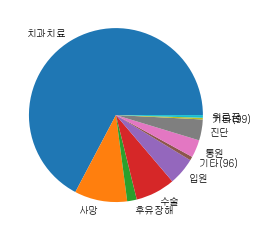

In [12]:
grouped = df_d.groupby("MGG_GRP_CD_").count()

mgg_arr = []
labels = []

for i in df_d.MGG_GRP_CD_.unique():
    mgg_arr.append(grouped["JOIN_SN"][i])
    labels.append(i)
plt.pie(mgg_arr, labels=labels)
plt.show()

# 납입주기코드 먼저 봐서 연납.월납.일시납 중 뭐가 많은지

In [13]:
df_d.groupby("CT_PY_CYCLE_CD").count() # 2: 월납 압도적 > 월납으로 가기 

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,,,,
2,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676,...,7676,7676,7676,7676,7676,7676,7676,7676,7676,7676
3,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


# 가장 많이 선택된 납입코드의 납입기간은 어떤 비율인지.

In [14]:
# 납입주기코드(CT_PY_CYCLE_CD) 월납 > 납입기간(CT_PY_PD)
df_d[df_d.CT_PY_CYCLE_CD == 2].groupby("CT_PY_PD").count().JOIN_SN

CT_PY_PD
3       12
5     3174
6       18
8       10
9        3
10    3450
11       5
13       3
14       5
15     419
16      15
20     402
21       5
22      10
24      10
25      39
28       3
30      26
35      20
40      31
45       8
48       5
49       3
Name: JOIN_SN, dtype: int64

# 보험기간(종기월 - 시기월)의 비율을 어떠한지

In [15]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 46 to 407408
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JOIN_SN         7716 non-null   int64 
 1   JOIN_SN_TYP     7716 non-null   int64 
 2   BTH_YR          7716 non-null   int64 
 3   GENDER          7716 non-null   int64 
 4   IS_KRN          7716 non-null   int64 
 5   AGE             7716 non-null   int64 
 6   SCTR_CD         7716 non-null   int64 
 7   COM_SN          7716 non-null   int64 
 8   POL_SN          7716 non-null   int64 
 9   GIS_CD          7716 non-null   int64 
 10  INS_GBN_CD      7716 non-null   int64 
 11  INS_CT_STAT_CD  7716 non-null   int64 
 12  CT_ST_DT        7716 non-null   object
 13  CT_END_DT       7716 non-null   object
 14  CT_PY_AMT       7716 non-null   int64 
 15  CT_PY_CYCLE_CD  7716 non-null   int64 
 16  CT_PY_PD        7716 non-null   int64 
 17  CT_CHNL_CD      7716 non-null   int64 
 18  INSU_

In [16]:
df_d[["CT_END_DT", "CT_ST_DT", "INSU_DAYS", "INSU_YEAR"]].head(50)

,CT_END_DT,CT_ST_DT,INSU_DAYS,INSU_YEAR
46,2025-01-01,2020-01-01,1827,6
47,2025-01-01,2020-01-01,1827,6
48,2025-01-01,2020-01-01,1827,6
319,2025-05-01,2015-05-01,3653,11
320,2025-05-01,2015-05-01,3653,11
321,2025-05-01,2015-05-01,3653,11
322,2020-05-01,2015-05-01,1827,6
323,2020-05-01,2015-05-01,1827,6
324,2020-05-01,2015-05-01,1827,6
394,2052-05-01,2017-05-01,12784,36


In [17]:
# df_d.INSU_YEAR.unique() 

In [18]:
# 보장기간의 시각화 
# df_d.groupby("INSU_YEAR").count()

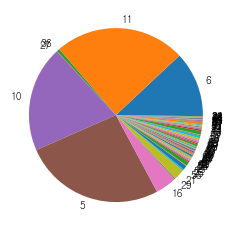

In [19]:
# 보장기간의 시각화2 
# 굉장히 ; 다양하네 흠.....그래도 제일 많은 5년을 기준으로 확인해보자!
df1_group = df_d.groupby("INSU_YEAR").count()

INSU_YEAR_arr = []
labels=[]
for i in df_d.INSU_YEAR.unique():
    INSU_YEAR_arr.append(df1_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(INSU_YEAR_arr, labels=labels)
plt.show()

In [20]:
df_d.INSU_YEAR.describe()

count    7716.000000
mean       11.678720
std        10.306078
min         4.000000
25%         5.000000
50%        10.000000
75%        11.000000
max        77.000000
Name: INSU_YEAR, dtype: float64

# 보장기간 별 납입금액 비율 시각화 (단위: 천원)

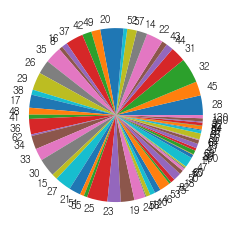

In [21]:
# 보장기간 5년의 납입금액 비율 시각화 (천단위)
df_group = df_d[df_d.INSU_YEAR == 5].groupby("CT_PY_AMT").count()

INSU_YEAR_arr = []
labels=[]
for i in df_d[df_d.INSU_YEAR == 5].CT_PY_AMT.unique():
    INSU_YEAR_arr.append(df_group["JOIN_SN"][i])
    labels.append(i)
plt.pie(INSU_YEAR_arr, labels=labels)
plt.show()

# 납입 == 보장 기간 10년인 사람들로만 해보자! 

In [22]:
df_d = df_d[(df_d.INSU_YEAR == 10)]

In [38]:
df_d

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
584,1195073,1,1979,2,1,44,8,3193547,661419,22,...,10,3,3652,10,A95,A9500,1,360,치과치료,4
2545,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9500,29,520,치과치료,4
2546,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9509,1,240,치과치료,4
2547,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9500,29,520,치과치료,4
2548,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9509,1,240,치과치료,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407401,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9509,1,330,치과치료,3
407402,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9500,34,960,치과치료,3
407403,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A5,A5999,2,100,수술,3
407404,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9599,1,660,치과치료,3


In [36]:
df_d[["CT_PY_PD","INSU_YEAR"]].head(50)

,CT_PY_PD,INSU_YEAR
584,10,10
2545,10,10
2546,10,10
2547,10,10
2548,10,10
2589,10,10
2590,10,10
2591,10,10
2592,10,10
2593,10,10


# 연령, 성별에 따른 추가 분석

In [24]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8

In [25]:
df_d["AGE_CAT"] = df_d["AGE"].apply(category_age)
df_d

C:\Users\multicampus\AppData\Local\Temp\ipykernel_3608\383899824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d["AGE_CAT"] = df_d["AGE"].apply(category_age)


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
584,1195073,1,1979,2,1,44,8,3193547,661419,22,...,10,3,3652,10,A95,A9500,1,360,치과치료,4
2545,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9500,29,520,치과치료,4
2546,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9509,1,240,치과치료,4
2547,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9500,29,520,치과치료,4
2548,896163,1,1983,2,1,40,6,6781780,1067887,38,...,10,6,3652,10,A95,A9509,1,240,치과치료,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407401,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9509,1,330,치과치료,3
407402,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9500,34,960,치과치료,3
407403,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A5,A5999,2,100,수술,3
407404,1225148,1,1989,2,1,34,6,6823861,4486972,39,...,10,6,3652,10,A95,A9599,1,660,치과치료,3


In [26]:
# 연령대별 납입 보험료 평균값 확인하기 (단위 : 천원)
df_d.groupby("AGE_CAT").CT_PY_AMT.mean()

AGE_CAT
1    22.454545
2    24.807692
3    28.182222
4    30.832000
5    35.075314
6    40.668712
7    29.903226
8    17.000000
Name: CT_PY_AMT, dtype: float64

In [27]:
# 성별 납입 보험료 평균값 확인하기 (단위 : 천원)
# 성별 비율 확인하기
df_d.groupby("GENDER").count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,...,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_GRP_CD_,AGE_CAT
GENDER,,,,,,,,,,,,,,,,,,,,,
1,732,732,732,732,732,732,732,732,732,732,...,732,732,732,732,732,732,732,732,732,732
2,787,787,787,787,787,787,787,787,787,787,...,787,787,787,787,787,787,787,787,787,787


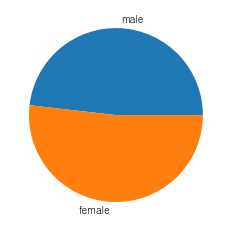

In [28]:
# 성별 비율 그래프로 확인
gender_cnt = df_d.groupby("GENDER").count()
male = gender_cnt["JOIN_SN"][1]
female = gender_cnt["JOIN_SN"][2]

plt.pie([male, female], labels=["male", "female"])
plt.show()

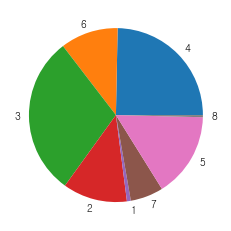

In [29]:
# 연령
age_arr = []
labels = []

age_cnt = df_d.groupby("AGE_CAT").count()
for i in df_d["AGE_CAT"].unique():
    age_arr.append(age_cnt["JOIN_SN"][i])
    labels.append(i)
    
plt.pie(age_arr, labels=labels)
plt.show()

# 보험담보 그룹코드별 성별 비율

In [30]:
dfs = {}
for a in df_d.MGG_GRP_CD_.unique():
    dfs[a] = df_d[df_d["MGG_GRP_CD_"] == a]

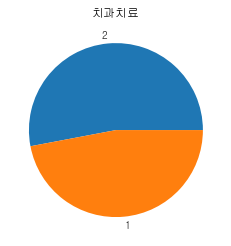

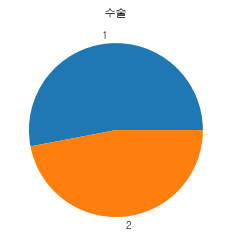

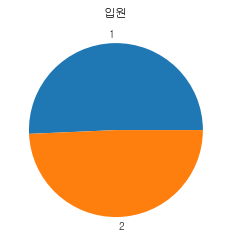

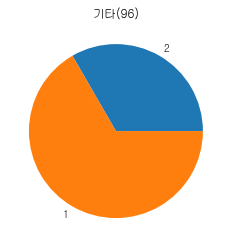

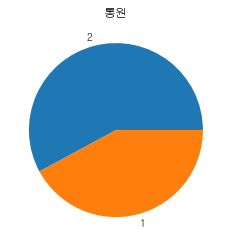

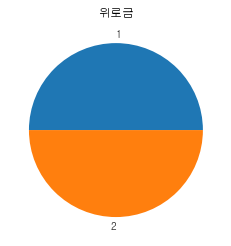

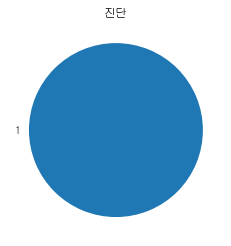

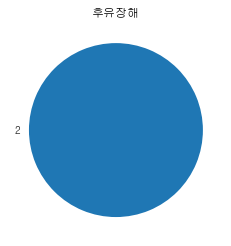

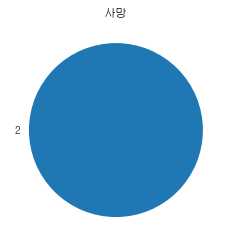

In [31]:
for a in df_d.MGG_GRP_CD_.unique():
    arr = []
    labels = []
    df = dfs[a]
    df.groupby("GENDER").count()
    gender_cnt = df.groupby("GENDER").count()
    for i in df.GENDER.unique():
        arr.append(gender_cnt["JOIN_SN"][i])
        labels.append(i)

    plt.pie(arr, labels=labels)
    plt.title(a)
    plt.show()

# 보험담보그룹 별 나이대 비율 

[4 6 3 2 1 7 5 8]


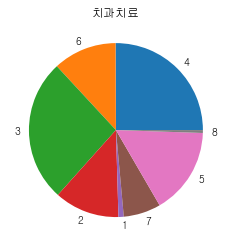

[6 4 5 2 3 7]


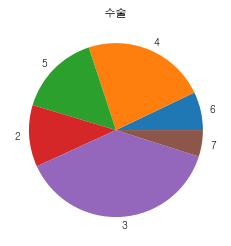

[6 4 5 2 3 7]


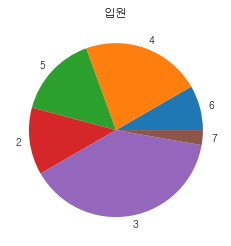

[5 3 4 7 6]


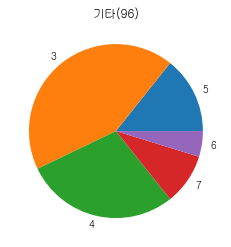

[3 4 2 5 6]


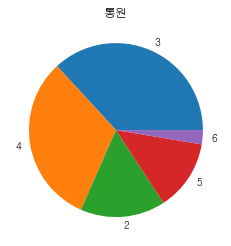

[3 4]


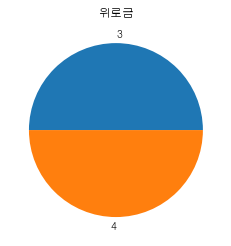

[2 6]


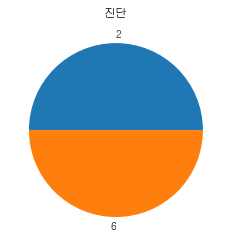

[6]


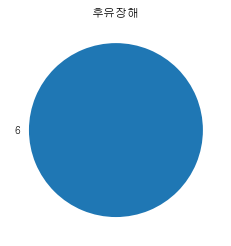

[6 3]


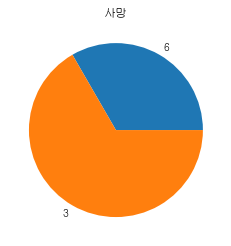

In [32]:
for a in df_d.MGG_GRP_CD_.unique():
    df = dfs[a]
    age_cnt = df.groupby("AGE_CAT").count()
    age_arr = []
    labels = []
    print(df.AGE_CAT.unique())

    for i in df.AGE_CAT.unique():
        if age_cnt["AGE"][i]:
            age_arr.append(age_cnt["AGE"][i])
            labels.append(i)
    plt.pie(age_arr, labels=labels)
    plt.title(a)
    plt.show()

['A95']


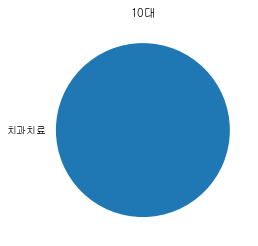

['A95' 'A6' 'A5' 'A7' 'A4']


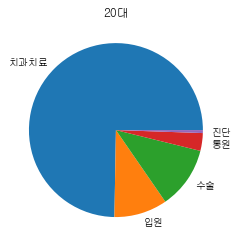

['A95' 'A7' 'A5' 'A6' 'A96' 'A94' 'A1']


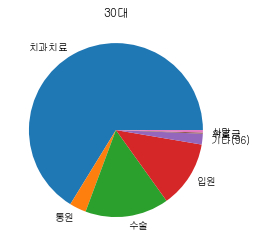

['A95' 'A5' 'A6' 'A7' 'A96' 'A94']


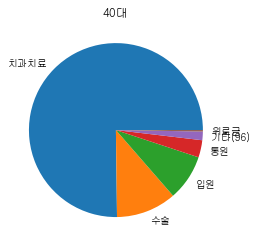

['A96' 'A95' 'A5' 'A6' 'A7']


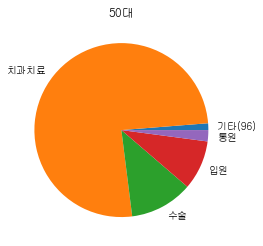

['A95' 'A5' 'A6' 'A7' 'A4' 'A3' 'A1' 'A96']


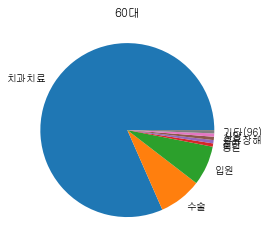

['A95' 'A5' 'A6' 'A96']


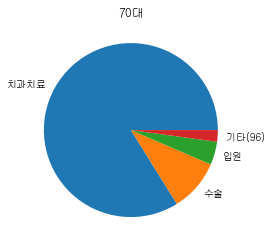

['A95']


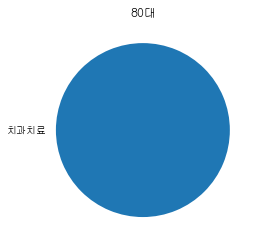

In [33]:
# 나이대별 보험담보그룹 비율

dfs_age = {}
for n in df_d.AGE_CAT.unique():
    dfs_age[n] = df_d[df_d["AGE_CAT"] == n]
    
for n in sorted(df_d.AGE_CAT.unique()):
    df = dfs_age[n]
    mgg_cnt = df.groupby("MGG_GRP_CD_").count()
    mgg_arr = []
    labels = []
    print(df.MGG_GRP_CD.unique())
#     print(age_cnt)
    for i in df.MGG_GRP_CD_.unique():
        if mgg_cnt["JOIN_SN"][i]:
            mgg_arr.append(mgg_cnt["JOIN_SN"][i])
            labels.append(i)
    plt.pie(mgg_arr, labels=labels)
    plt.title(f"{n}0대")
    plt.show()

In [34]:
df_dd = df_d.copy()
df_dd = df_dd[df_dd["MGG_GRP_CD"] == 'A95']

['A9500' 'A9509']


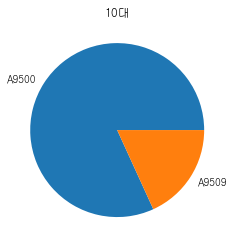

['A9509' 'A9500' 'A9599']


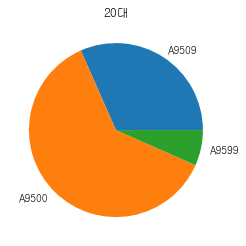

['A9500' 'A9509' 'A9599']


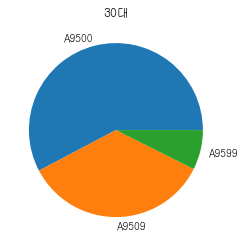

['A9500' 'A9509' 'A9599']


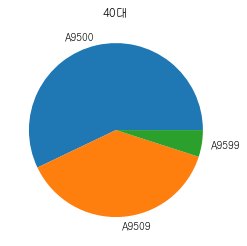

['A9599' 'A9509' 'A9500']


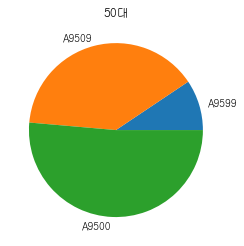

['A9509' 'A9599' 'A9500']


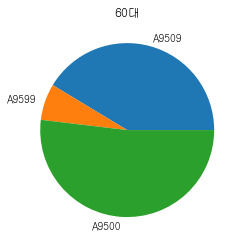

['A9509' 'A9500' 'A9599']


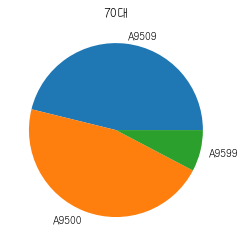

['A9509' 'A9500']


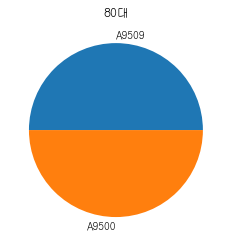

In [35]:
# 연령별로 치과치료(A95)내에서 어떤 코드를 주로 챙기는가?
# 9500 : 보존치료, 9509 : 보철치료, 9599 : 기타치과담보
dfs_age = {}
for n in df_dd.AGE_CAT.unique():
    dfs_age[n] = df_dd[df_dd["AGE_CAT"] == n]
    
for n in sorted(df_dd.AGE_CAT.unique()):
    df = dfs_age[n]
    mgg_cnt = df.groupby("MGG_CD").count()
    mgg_arr = []
    labels = []
    print(df.MGG_CD.unique())

    for i in df.MGG_CD.unique():
        if mgg_cnt["JOIN_SN"][i]:
            mgg_arr.append(mgg_cnt["JOIN_SN"][i])
            labels.append(i)
    plt.pie(mgg_arr, labels=labels)
    plt.title(f"{n}0대")
    plt.show()